This notebook is an example of Exploratory Data Analysis. I recieved this dataset through my MIT applied data science program and went through this EDA completely unguided. Here I will walk you through my EDA process. 

First step: importing all the libraries I need for the EDA. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

Next I will read in the csv file and use .head() and .describe() to get an understanding of the variables.

In [2]:
data = pd.read_csv('CardioGoodFitness.csv')

In [3]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [4]:
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
data.dtypes.value_counts()

int64     6
object    3
dtype: int64

This dataset is for the purchase history of treadmills for an unknown company. One row of the data is one purchase with information collected about the buyer. 

Through that investigation it appears our dataset has 9 variables. 6 are continuous and 3 are categorical. 
In my notes I have described the variables so I know how to approach them when making visualizations. 

1. Product: Product purchased, categorical
2. Gender: Male or Female categorical, binary 
3. Age: Age of the customer in years, continous
4. Education: Education of the customer in years, continous
5. MaritalStatus: Single or partnered categorical, binary 
6. Income: Annual household income continous, ratio 
7. Usage: The average number of times the customer plans to use the treadmill each week, continous
8. Miles: The average number of miles the customer expects to walk/run each week, continous
9. Fitness: Self-rated fitness on a 1-to-5 scale, categorical, ordinal 

Next I will run a check to output a table to see if there are any missing values. It appears that there are not.

In [7]:
def missing_check(df):
    total = data.isnull().sum().sort_values(ascending=False)  
    percent = (data.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) 
    return missing_data
missing_check(data)

,Total,Percent
Product,0,0.0
Age,0,0.0
Gender,0,0.0
Education,0,0.0
MaritalStatus,0,0.0
Usage,0,0.0
Fitness,0,0.0
Income,0,0.0
Miles,0,0.0


My next step in the process is to think of questions about the dataset that are worth investigating. Here are some questions I came up with: 
    
1. Which product is popular with users who run more miles?
2. What is the distribution of different variables in the data?
3. Which product is more popular among males or females?
4. Is the product purchase affected by the marital status of the customer?


Which product is popular with users who run more miles? Here it apperars the TM798 is used more by users who plan to run more miles a week.

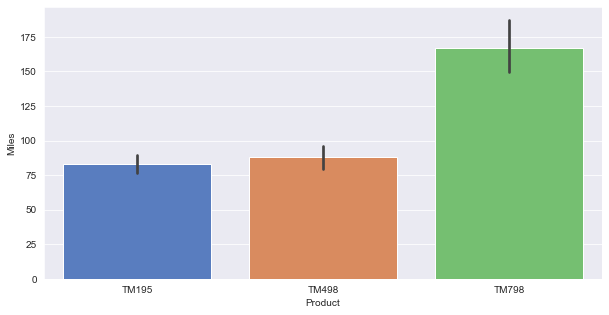

In [8]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='Product', y='Miles', data=data, palette='muted') 

What is the distribution of different variables in the data? The next few plots show the distrubution of the data. Histograms are used for continous data and count plots for categorical data. It appears the average user is between 25 and 30, and is a married, college educated man, who uses the treadmill 3 times a week and rates their fitness level as a 3 out of 5. While most users wont fit this exact description it is what is most common among the distributions.

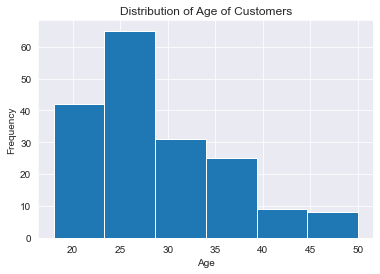

In [9]:
plt.hist(data['Age'], bins= 6)
plt.title('Distribution of Age of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

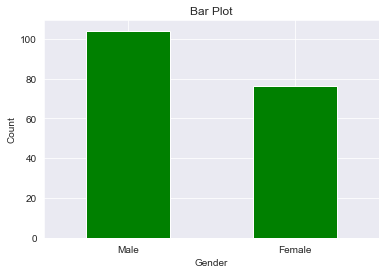

In [10]:
data['Gender'].value_counts().plot(kind='bar', rot = 0, color = 'green')
plt.title('Bar Plot')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

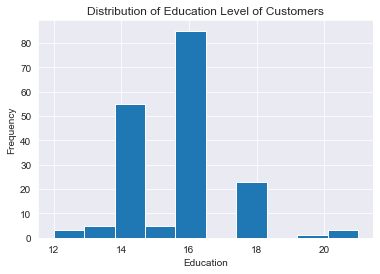

In [11]:
plt.hist(data['Education'], bins= 10)
plt.title('Distribution of Education Level of Customers')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.show()

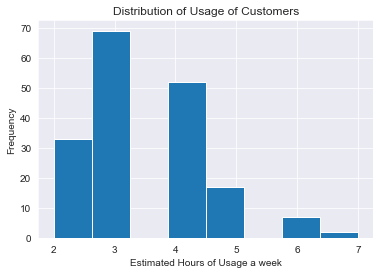

In [12]:
plt.hist(data['Usage'], bins= 8)
plt.title('Distribution of Usage of Customers')
plt.xlabel('Estimated Hours of Usage a week')
plt.ylabel('Frequency')
plt.show()

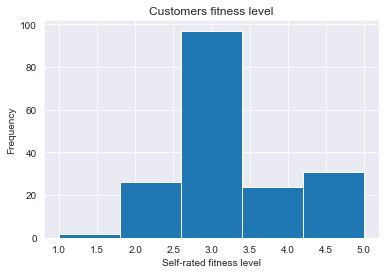

In [13]:
plt.hist(data['Fitness'], bins= 5)
plt.title('Customers fitness level')
plt.xlabel('Self-rated fitness level')
plt.ylabel('Frequency')
plt.show()

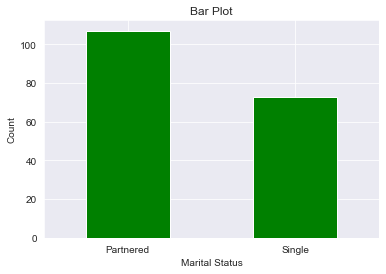

In [14]:
data['MaritalStatus'].value_counts().plot(kind='bar', rot = 0, color = 'green')
plt.title('Bar Plot')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

I was curious to see if any of the variables had a strong correlation. Using the seaborn heatmap function I can take a quick look at all the continuous varables at once. Here we can see that usage and miles and self-rated fitness levels are positively correlated at 0.7 and 0.8 respectively. This makes sense that users who run or walk more might view themselves as more fit. Income and education are positively corelated which also makes logical sense. 

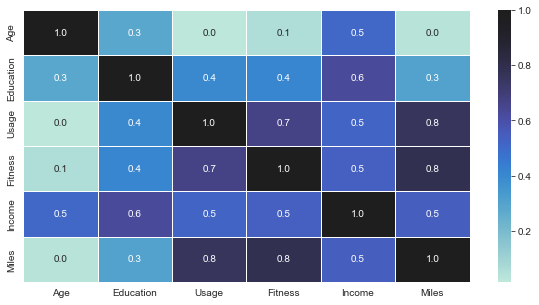

In [15]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1);

To answer the question, "Which product is more popular among males or females", I made the following plot. We can see that men and women buy the TM195 and TM498 at about the same rate. However many more men buy the TM798. 

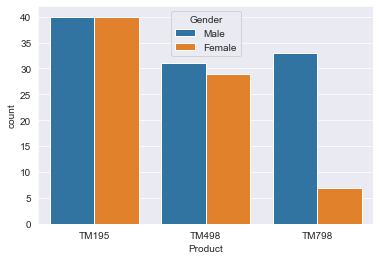

In [16]:
sns.countplot(x="Product", hue="Gender", data=data);


To answer the question, "Is the product purchased affected by marital status?" I made the following count plot with two categorical variables. The ratio between purchases from married vs single people for each product appears to relect the maritial status of the sample. 

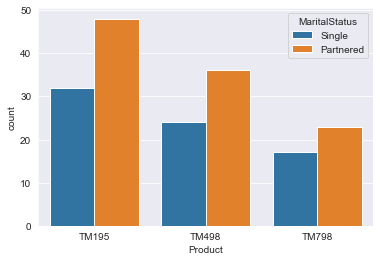

In [17]:
sns.countplot(x="Product", hue="MaritalStatus", data=data);